## Register Huggingface and get your API_KEY

[How to get your key](https://docs.google.com/presentation/d/1ptFrSvLMUxx9YDE7TzSexE0GQj-mSANOusBDgKo7jBs/edit?usp=sharing) - pages 3-11

In [ ]:
API_KEY= "YOUR_API_KEY"

Download a sample image

In [ ]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

('dog.jpg', <http.client.HTTPMessage at 0x7cc26efb6110>)

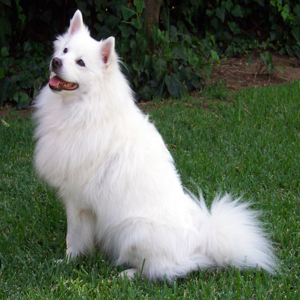

In [ ]:
from PIL import Image
image = Image.open(filename)
# resize for visualization
newsize = (300, 300)
im1 = image.resize(newsize)
im1

# Image Classification

In [ ]:
import requests

API_URL_IC = "https://api-inference.huggingface.co/models/google/vit-base-patch16-224"
headers = {"Authorization": f"Bearer {API_KEY}"}

def query(filename,API_URL):
    with open(filename, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()

output_IC = query("dog.jpg",API_URL_IC) # Send a request to initiate an inference session
import time
time.sleep(30) # Estimate inference time: 30 seconds
output_IC = query("dog.jpg",API_URL_IC) # Resend a request for receive the result
output_IC

[{'label': 'Samoyed, Samoyede', 'score': 0.6963340640068054},
 {'label': 'Pomeranian', 'score': 0.15980468690395355},
 {'label': 'keeshond', 'score': 0.04071059450507164},
 {'label': 'Great Pyrenees', 'score': 0.012056825682520866},
 {'label': 'Eskimo dog, husky', 'score': 0.008726603351533413}]

# Object Detection

In [ ]:
# Change your API_URL: https://api-inference.huggingface.co/models/{publisher}/{model_name}
API_URL_OD = "https://api-inference.huggingface.co/models/facebook/detr-resnet-50"

In [ ]:
output_OD = query("dog.jpg",API_URL_OD)
time.sleep(30)
output_OD = query("dog.jpg",API_URL_OD)
output_OD

[{'score': 0.898681640625,
  'label': 'dog',
  'box': {'xmin': 159, 'ymin': 36, 'xmax': 1458, 'ymax': 1153}}]

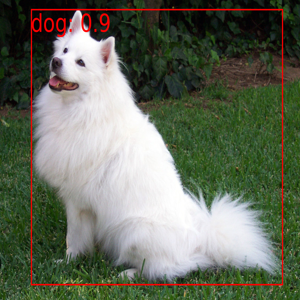

In [ ]:
"""
Result:
  score:  Confidence score
  label:  Object-class
  box:    Bounding box vertex coordinates
"""
# Visualization
from PIL import ImageDraw,ImageFont
import os
import cv2

font_path = os.path.join(cv2.__path__[0],'qt','fonts','DejaVuSans.ttf')
font = ImageFont.truetype(font_path, size=100)
image2 = image.copy()
draw = ImageDraw.Draw(image2)

for prediction in output_OD:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]

    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=6)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red", font=font)

im2 = image2.resize(newsize)
im2

# Image Segmentation

In [ ]:
# Change your API_URL
API_URL_IS = "https://api-inference.huggingface.co/models/nvidia/segformer-b0-finetuned-ade-512-512"

In [ ]:
output_IS = query("dog.jpg",API_URL_IS)
time.sleep(30)
output_IS = query("dog.jpg",API_URL_IS)
output_IS

[{'score': 1.0,
  'label': 'tree',
  'mask': 'iVBORw0KGgoAAAANSUhEUgAABgoAAAS9CAAAAACzbF38AAAc/klEQVR4nO3d23qcuBIGUNjfvP8rsy9iJ+420BwkVCqtdTGT2E6blkr6ETQwLxNkNj/yW5KMo2caK64k3XjF/1pvAACtiQKA4YkCgOGJAoDhzQOfJ2EMO6dCl0LnSRONoqFPHCfqx9NEAeltzm7L/rcPyjaExg2DbD15iihgAKuz2/LpB47IOX7GTIOcfXmUKGAIvya39cI/NwcOMngGCYZBenOLKGAg35PakarfnQCHGzb542C4Ln0jCmDP2xw47HjJngXDduw3UQAckDoLTIOuKwBGJwlEAXBI3ulyyfvWTviv9QYANCMGvogCYFBy4B9RAAxJEPzkXAEwIknwQhQARySbOpO9ndtEAcDwRAEwHouCN6IAYHiiABiORcE7HyaF0/7cj8d00i1d94sogHNS35eNUTlABDA8UQCnWBSQkSiAi4QCeYgCgOGJAoDhiQI4w1EhUhIFwBFCMDVRwABm0xjscokZQ5hLXV+6TJOrjTun41aIAjhtxLkky8JqxL47QhQwBBPAPUmCQBlscq4A+EQSpGdVAHyQIwkEwR6rAkZgFkAN7Cr2wQogqQyLAhPdB1YFQHqS4BPnCoBd/S8KBMFnogBITRAc4QARkJkkOMSqAEhLDhwlCoCc5MAJogDIRwycJAqAXMTABaIAyEQQXOITREAikuAaqwIgDUFwlVUBsKuj6bWjTY1GFAC7+rnxhCS4ThQADE8UAHv6WRRwgygAGJ4oABieKIhntiInDtU4BtcVRDNP0zT7KATwJKuCWL5XBHbFgAeJgkh+HBpylAjOMmiuc4AojPcynh0kAh5ivglidX9G59BaZzvahsxVDhBF1tkwhNYMmatEQWgKm6b6O2XV3QZHIQpi2CpghU1DPZZff+kVgygIYbt61TWcIwyuEA

Class: animal


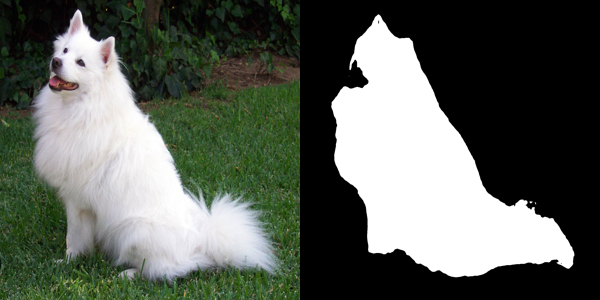

In [ ]:
"""
Result:
  score:  Confidence score
  label:  Object-class
  mask:   The corresponding mask as a black-and-white image (base64-encoded).
"""
import io
import base64

# Find the dog
idx = next((i for i, item in enumerate(output_IS) if item['label'] == "animal"), None)

# Your Base64 image data
base64_image_data = output_IS[idx]['mask']

print("Class:", output_IS[idx]['label'])
# Decode the Base64 string and display the image
image_data = base64.b64decode(base64_image_data)
image3 = Image.open(io.BytesIO(image_data))

# Visualization
im3 = image3.resize(newsize)
base_height = min(im1.height, im3.height)
combined_width = im1.width + im3.width
combined_image = Image.new('RGB', (combined_width, base_height))
combined_image.paste(im1, (0, 0))
combined_image.paste(im3, (im1.width, 0))
combined_image